In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
df = pd.read_csv('./pca_data/combined_pca_data.csv')

In [3]:
# Preview and Explore
df.head()

,YEAR_MONTH,REGION_NAME,BNF_CHEMICAL_SUBSTANCE,ITEMS,NIC
0,202101,LONDON,Co-magaldrox (Magnesium/aluminium hydroxide),30,113.24
1,202101,LONDON,Co-magaldrox (Magnesium/aluminium hydroxide),18,60.58
2,202101,LONDON,Co-magaldrox (Magnesium/aluminium hydroxide),249,833.94
3,202101,LONDON,Co-magaldrox (Magnesium/aluminium hydroxide),296,1006.14
4,202101,LONDON,Magnesium oxide,1,134.95


In [4]:
# Rename Net Ingredient Cost (NIC) to Cost
df.rename(columns={'NIC': 'COST'}, inplace = True)

In [5]:
# Create a year column
year_col = df['YEAR_MONTH'].astype(str).str[:4]

In [6]:
# Insert the column at the beginning of the dataframe
df.insert(0, 'YEAR', year_col)

In [7]:
# View the first five rows of the dataset
df.head()

,YEAR,YEAR_MONTH,REGION_NAME,BNF_CHEMICAL_SUBSTANCE,ITEMS,COST
0,2021,202101,LONDON,Co-magaldrox (Magnesium/aluminium hydroxide),30,113.24
1,2021,202101,LONDON,Co-magaldrox (Magnesium/aluminium hydroxide),18,60.58
2,2021,202101,LONDON,Co-magaldrox (Magnesium/aluminium hydroxide),249,833.94
3,2021,202101,LONDON,Co-magaldrox (Magnesium/aluminium hydroxide),296,1006.14
4,2021,202101,LONDON,Magnesium oxide,1,134.95


In [8]:
# Get the structure of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29952074 entries, 0 to 29952073
Data columns (total 6 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   YEAR                    object 
 1   YEAR_MONTH              int64  
 2   REGION_NAME             object 
 3   BNF_CHEMICAL_SUBSTANCE  object 
 4   ITEMS                   int64  
 5   COST                    float64
dtypes: float64(1), int64(2), object(3)
memory usage: 1.3+ GB


In [9]:
# Convert Year from object type to int
df['YEAR'] = df['YEAR'].astype(int)

In [10]:
# Convert YEAR_MONTH from numeric format (YYYYMM) to string date format (YYYY-MM)
df['YEAR_MONTH'] = pd.to_datetime(df['YEAR_MONTH'], format='%Y%m').dt.strftime('%Y-%m')

In [11]:
# Summary statistics of the numerical variables
df.describe()

,YEAR,ITEMS,COST
count,2.995207e+07,2.995207e+07,2.995207e+07
mean,2.022691e+03,1.725240e+02,1.518166e+03
std,1.264326e+00,1.651102e+03,1.150422e+04
min,2.021000e+03,1.000000e+00,0.000000e+00
25%,2.022000e+03,1.000000e+00,3.040000e+01
50%,2.023000e+03,4.000000e+00,1.204800e+02
75%,2.024000e+03,2.300000e+01,5.388600e+02
max,2.025000e+03,2.311960e+05,2.705494e+06


In [12]:
# Check for missing values in each column
df.isnull().sum()

YEAR                      0
YEAR_MONTH                0
REGION_NAME               0
BNF_CHEMICAL_SUBSTANCE    0
ITEMS                     0
COST                      0
dtype: int64

In [13]:
# Define the list of antidepressant chemical substances
antidepressant_substances = [
    'Agomelatine', 'Amitriptyline hydrochloride', 'Citalopram hydrobromide',
    'Citalopram hydrochloride', 'Clomipramine hydrochloride', 'Dosulepin hydrochloride',
    'Doxepin', 'Duloxetine hydrochloride', 'Escitalopram',
    'Fluoxetine hydrochloride', 'Flupentixol hydrochloride',
    'Fluvoxamine maleate', 'Imipramine hydrochloride', 'Isocarboxazid',
    'Lofepramine hydrochloride', 'Mianserin hydrochloride', 'Mirtazapine',
    'Moclobemide', 'Nefazodone hydrochloride', 'Nortriptyline',
    'Oxitriptan', 'Paroxetine hydrochloride', 'Phenelzine sulfate',
    'Reboxetine', 'Sertraline hydrochloride', 'Tranylcypromine sulfate',
    'Trazodone hydrochloride', 'Trimipramine maleate', 'Tryptophan',
    'Venlafaxine', 'Vortioxetine', 'Amoxapine'
]

# Filter the DataFrame to include only rows with antidepressant substances
df = df[df['BNF_CHEMICAL_SUBSTANCE'].isin(antidepressant_substances)]


In [14]:
# Group the dataset per NHS Region, per year and per year-month, the volume and cost of each antidepressant drug prescribed.
pca_regional_drug_summary_df = df.groupby(
    ['YEAR', 'YEAR_MONTH', 'REGION_NAME', 'BNF_CHEMICAL_SUBSTANCE']
).agg(
    ITEMS=('ITEMS', 'sum'),
    COST=('COST', 'sum')
).reset_index()

In [15]:
# View the first five rows of the new dataframe
pca_regional_drug_summary_df.head()

,YEAR,YEAR_MONTH,REGION_NAME,BNF_CHEMICAL_SUBSTANCE,ITEMS,COST
0,2021,2021-01,EAST OF ENGLAND,Agomelatine,183,7405.37
1,2021,2021-01,EAST OF ENGLAND,Amitriptyline hydrochloride,153891,320331.06
2,2021,2021-01,EAST OF ENGLAND,Citalopram hydrobromide,163948,219490.05
3,2021,2021-01,EAST OF ENGLAND,Citalopram hydrochloride,752,12357.66
4,2021,2021-01,EAST OF ENGLAND,Clomipramine hydrochloride,2824,22170.92


In [16]:
# Check the number of antidepressants in the new dataframe
pca_regional_drug_summary_df['BNF_CHEMICAL_SUBSTANCE'].nunique()

32

In [17]:
# Check the shape of the new dataframe
pca_regional_drug_summary_df.shape

(10688, 6)

### Top 10 prescribed anti-depressants across the whole time frame nationally

In [19]:
# Group by BNF_CHEMICAL_SUBSTANCE and sum the items
national_totals = pca_regional_drug_summary_df.groupby('BNF_CHEMICAL_SUBSTANCE', as_index=False)['ITEMS'].sum()

# Sort by total items in descending order and get top 10
top_10_drugs = national_totals.sort_values(by = 'ITEMS', ascending=False).head(10)
top_10_drugs


,BNF_CHEMICAL_SUBSTANCE,ITEMS
25,Sertraline hydrochloride,97786075
1,Amitriptyline hydrochloride,67366584
3,Citalopram hydrobromide,59371301
17,Mirtazapine,52993098
10,Fluoxetine hydrochloride,31950323
30,Venlafaxine,24519283
8,Duloxetine hydrochloride,17991300
9,Escitalopram,7588437
27,Trazodone hydrochloride,5537280
22,Paroxetine hydrochloride,5509982


### Top 5 most prescribed drugs in 2024

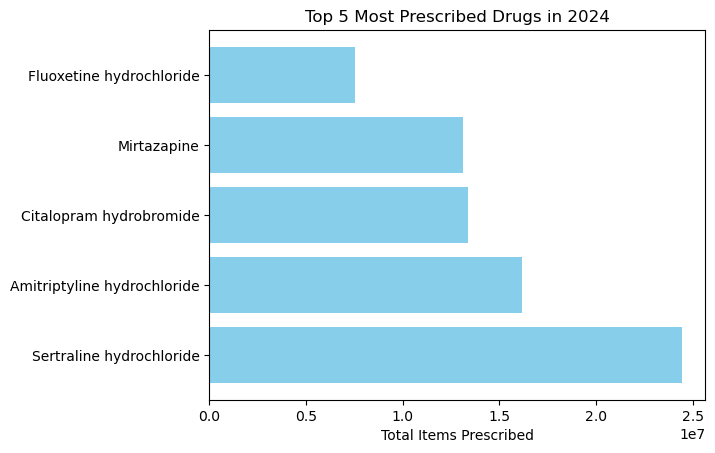

In [21]:
# Filter data for year 2024
df_2024 = pca_regional_drug_summary_df[pca_regional_drug_summary_df['YEAR'] == 2024]

# Group by drug and calculate total items prescribed
drug_totals_2024 = df_2024.groupby('BNF_CHEMICAL_SUBSTANCE', as_index=False)['ITEMS'].sum()

# Get top 5 most prescribed drugs in 2024
top5_drugs_2024 = drug_totals_2024.sort_values('ITEMS', ascending=False).head(5)

# Create horizontal bar chart
plt.barh(top5_drugs_2024['BNF_CHEMICAL_SUBSTANCE'], top5_drugs_2024['ITEMS'], color='skyblue')
plt.xlabel('Total Items Prescribed')
plt.title('Top 5 Most Prescribed Drugs in 2024');

### Function to get the Total annual cost of any anti-depressant prescribing in the any region

In [23]:
def plot_drug_cost(chemical_substance, region_name):
    # Filter data for specified drug and region
    filtered_data = pca_regional_drug_summary_df[
        (pca_regional_drug_summary_df['BNF_CHEMICAL_SUBSTANCE'] == chemical_substance) & 
        (pca_regional_drug_summary_df['REGION_NAME'] == region_name)
    ]
    
    # Group by year and sum COST
    annual_cost = filtered_data.groupby('YEAR', as_index=False)['COST'].sum()
    
    # Create a vertical bar chart
    plt.bar(annual_cost['YEAR'].astype(str), annual_cost['COST'], color='skyblue')
    plt.xlabel('Year')
    plt.ylabel('Cost (£)')
    plt.title(f'Annual Cost of {chemical_substance} in {region_name} Region')
    plt.show()


#### Total annual cost of Sertraline hydrochloride prescribing in the NORTH WEST region

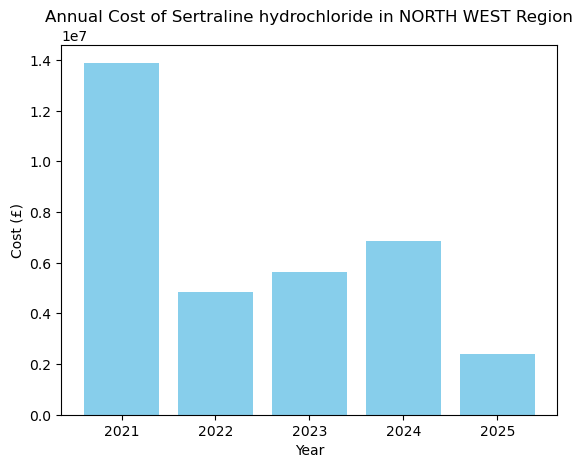

In [25]:
plot_drug_cost('Sertraline hydrochloride', 'NORTH WEST')

#### Total annual cost of Amitriptyline hydrochloride prescribing in the MIDLANDS region

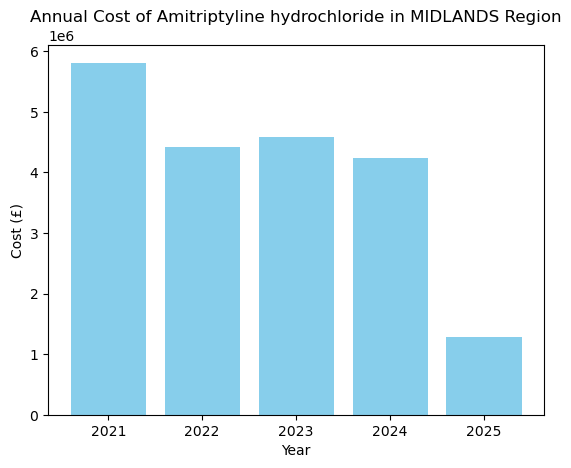

In [27]:
plot_drug_cost('Amitriptyline hydrochloride', 'MIDLANDS')

### Nationally monthly cost (rounded to the nearest pound) of any anti-depressant

In [29]:
def plot_monthly_drug_cost(chemical_substance):
    # Filter data for specified drug
    filtered_df = pca_regional_drug_summary_df[pca_regional_drug_summary_df['BNF_CHEMICAL_SUBSTANCE'] == chemical_substance]
    
    # Group by YEAR_MONTH and sum by COST
    monthly_cost = filtered_df.groupby('YEAR_MONTH', as_index=False)['COST'].sum()
    
    # Round cost to nearest pound
    monthly_cost['COST'] = monthly_cost['COST'].round(0).astype(int)
    
    # Create a line chart
    plt.figure(figsize=(12, 6))
    plt.plot(monthly_cost['YEAR_MONTH'], monthly_cost['COST'], color='skyblue')
    plt.xticks(rotation=90)
    plt.xlabel('Year-Month')
    plt.ylabel('Cost (£)')
    plt.title(f'Monthly Cost of {chemical_substance} (Rounded to Nearest Pound)')
    plt.tight_layout()
    plt.show()

#### Nationally monthly cost (rounded to the nearest pound) of Sertraline hydrochloride

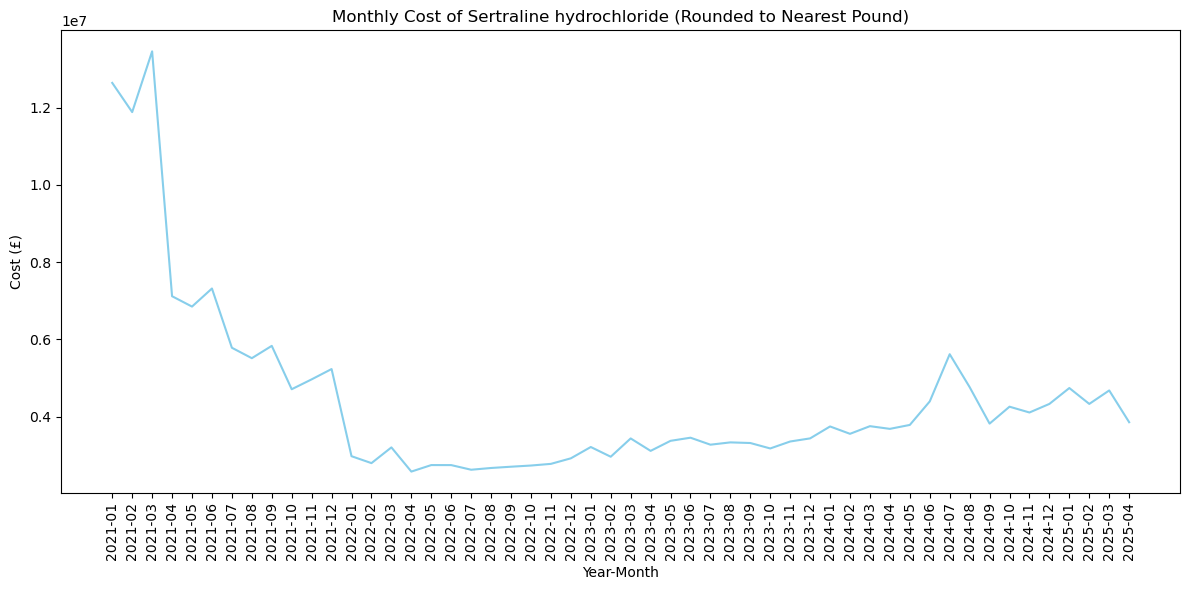

In [31]:
plot_monthly_drug_cost('Sertraline hydrochloride')

#### Nationally monthly cost (rounded to the nearest pound) of escitalopram

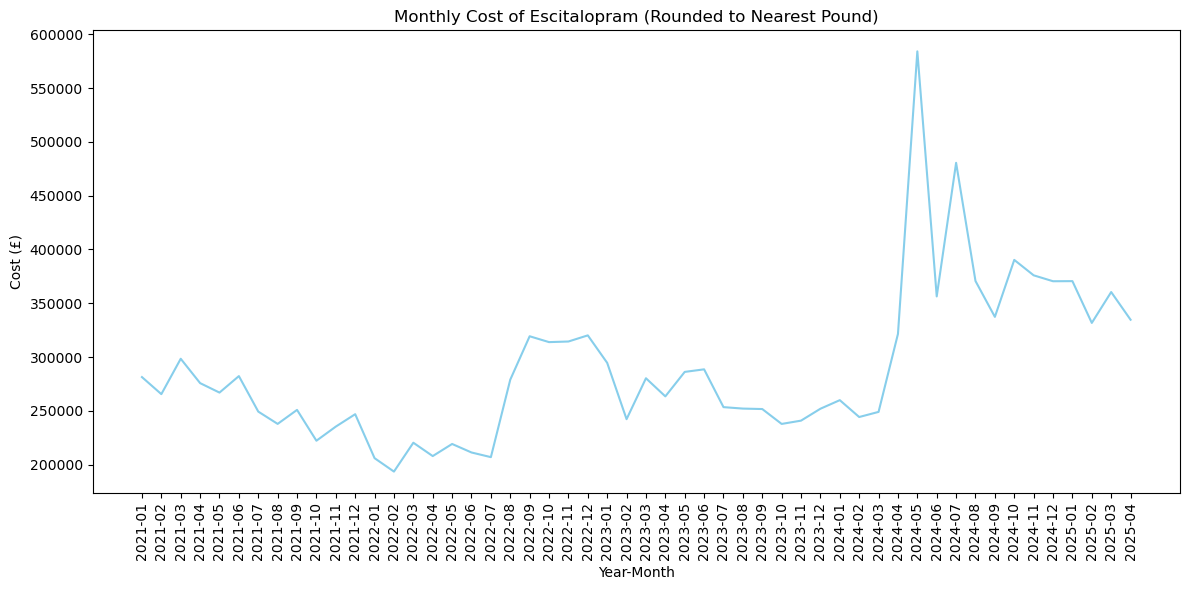

In [33]:
plot_monthly_drug_cost('Escitalopram')

### Monthly line chart showing total national prescribing cost

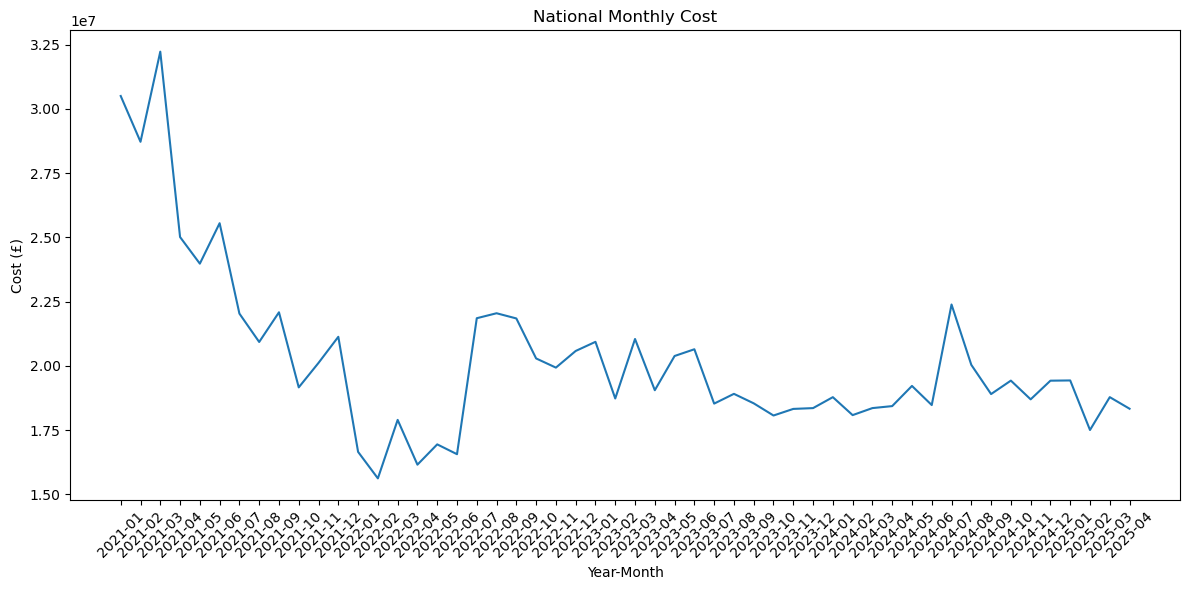

In [35]:
# Group by YEAR_MONTH and sum by COST
monthly_cost_df = pca_regional_drug_summary_df.groupby('YEAR_MONTH', as_index=False)['COST'].sum()

# Create a line chart
plt.figure(figsize=(12, 6))
plt.plot(monthly_cost_df['YEAR_MONTH'], monthly_cost_df['COST'])
plt.xticks(rotation=45)
plt.xlabel('Year-Month')
plt.ylabel('Cost (£)')
plt.title('National Monthly Cost')
plt.tight_layout();

### *Annual* summary statistics, for the min, Q1, median, Q3 and maximum national monthly prescribing cost (i.e. all drugs across all regions)

In [37]:
# Use describe method to get summary statistics by year
# Extract year from YEAR_MONTH
monthly_cost_df['YEAR'] = monthly_cost_df['YEAR_MONTH'].str[:4]
annual_cost_stats = monthly_cost_df.groupby('YEAR', as_index= False)['COST'].describe(
    percentiles=[0.25, 0.5, 0.75]
)

# Rename columns for clarity
annual_cost_stats = annual_cost_stats.rename(columns={
    'min': 'MIN_COST',
    '25%': 'Q1_COST',
    '50%': 'MEDIAN_COST',
    '75%': 'Q3_COST',
    'max': 'MAX_COST'
})

# Select only the columns we need
annual_cost_stats = annual_cost_stats[['YEAR', 'MIN_COST', 'Q1_COST', 'MEDIAN_COST', 'Q3_COST', 'MAX_COST']]
annual_cost_stats

,YEAR,MIN_COST,Q1_COST,MEDIAN_COST,Q3_COST,MAX_COST
0,2021,19165751.92,2.108352e+07,2.303388e+07,2.634587e+07,32228464.39
1,2022,15624554.54,1.663365e+07,1.891767e+07,2.089898e+07,22050128.20
2,2023,18071220.70,1.849039e+07,1.882394e+07,2.045244e+07,21048253.38
3,2024,18086671.23,1.846735e+07,1.884535e+07,1.942690e+07,22390495.89
4,2025,17507215.78,1.812803e+07,1.856028e+07,1.894809e+07,19435557.93


### Boxplots that shows the above information

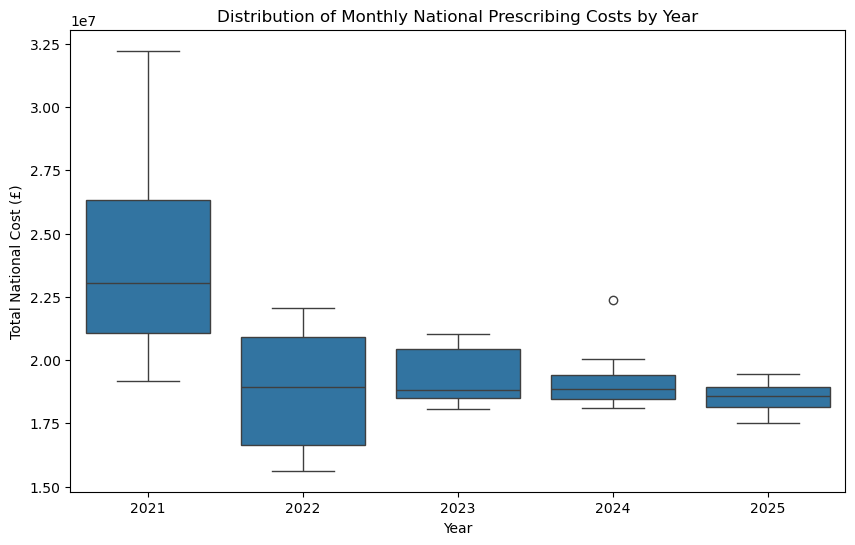

In [39]:
# Set figure size
plt.figure(figsize=(10, 6))

# Create boxplot using Seaborn
sns.boxplot(x='YEAR', y='COST', data=monthly_cost_df)

# Add title and labels
plt.title('Distribution of Monthly National Prescribing Costs by Year')
plt.xlabel('Year')
plt.ylabel('Total National Cost (£)');

### Annual mean monthly total national prescribing cost

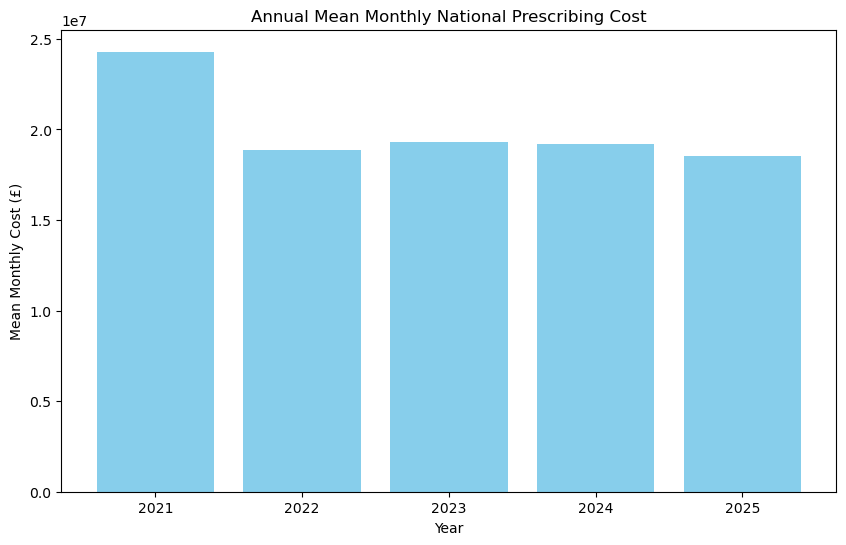

In [41]:
# Calculate the mean monthly cost for each year
annual_mean_costs = monthly_cost_df.groupby('YEAR', as_index=False)['COST'].mean()

# Create vertical bar chart
plt.figure(figsize=(10, 6))
plt.bar(annual_mean_costs['YEAR'], annual_mean_costs['COST'], color='skyblue')

# Add title and labels
plt.title('Annual Mean Monthly National Prescribing Cost')
plt.xlabel('Year')
plt.ylabel('Mean Monthly Cost (£)');

### Table that shows the cost of anti-depressant prescribing per region per year

In [43]:
# Create pivot table with years as rows and regions as columns
antidepressant_cost = pca_regional_drug_summary_df.pivot_table(
    values='COST',
    index='YEAR',
    columns='REGION_NAME',
    aggfunc='sum'
)

antidepressant_cost

REGION_NAME,EAST OF ENGLAND,LONDON,MIDLANDS,NORTH EAST AND YORKSHIRE,NORTH WEST,SOUTH EAST,SOUTH WEST
YEAR,,,,,,,
2021,32898810.41,32040317.87,54660728.89,54887869.51,42449533.83,44718283.20,29824347.28
2022,25820590.34,25493114.13,42573110.95,41971436.93,31904245.56,35511314.54,23143945.26
2023,26248425.22,26492825.12,44035768.67,43398636.48,32452392.01,35540021.85,23394154.11
2024,26231250.29,25889720.85,44055957.05,44576523.91,32136058.14,34830350.88,22540988.86
2025,8529704.24,7871708.83,14370561.28,14778227.69,10388104.04,11043443.51,7081586.15


In [44]:
# Create pivot table with years as rows and regions as columns
antidepressant_item = pca_regional_drug_summary_df.pivot_table(
    values='ITEMS',
    index='YEAR',
    columns='REGION_NAME',
    aggfunc='sum'
)

antidepressant_item

REGION_NAME,EAST OF ENGLAND,LONDON,MIDLANDS,NORTH EAST AND YORKSHIRE,NORTH WEST,SOUTH EAST,SOUTH WEST
YEAR,,,,,,,
2021,9699149,8644409,15436017,17750721,12468335,10639433,8323915
2022,9923442,9305059,16130321,18329287,12833009,10848010,8387069
2023,10204132,9811761,16817296,19100119,13265475,11089609,8542825
2024,10511229,9953948,17476788,20779391,13730488,11366165,8657500
2025,3494607,3191340,5851827,7198741,4559653,3766154,2836293


### Longitudinal Analysis of Antidepressant Prescribing

In [46]:
# Aggregate total items and total cost per year nationally
national_annual = pca_regional_drug_summary_df.groupby('YEAR', as_index=False).agg({
    'ITEMS': 'sum',
    'COST': 'sum'
})
national_annual

,YEAR,ITEMS,COST
0,2021,82961979,2.914799e+08
1,2022,85756197,2.264178e+08
2,2023,88831217,2.315622e+08
3,2024,92475509,2.302608e+08
4,2025,30898615,7.406334e+07


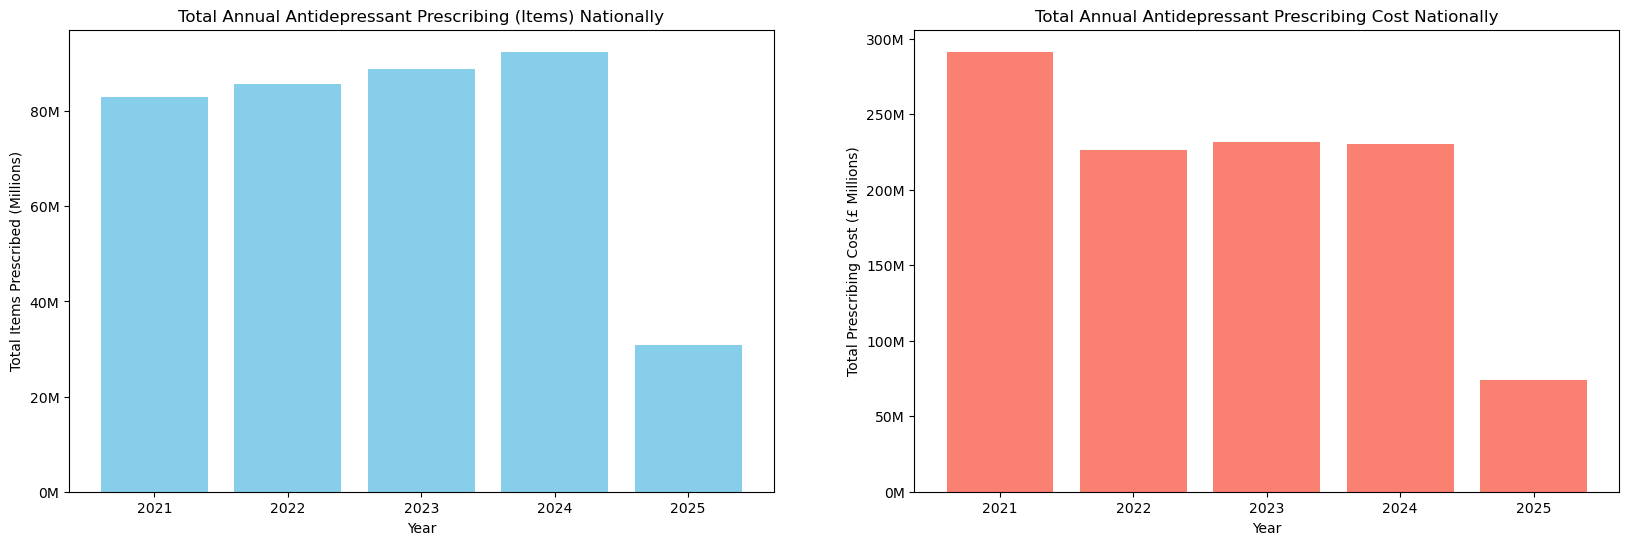

In [47]:
# Produce a vertical bar chart for total annual antidepressant prescribing (in items and cost)
import matplotlib.ticker as ticker
# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

# Function to format the y-axis labels in millions
def millions_formatter(x, pos):
    return f'{x / 1e6:.0f}M'

# Apply the formatter to both subplots
formatter = ticker.FuncFormatter(millions_formatter)

# Plot the first bar chart (Total Items Prescribed)
ax1.bar(national_annual['YEAR'], national_annual['ITEMS'], color='skyblue')
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Items Prescribed (Millions)')
ax1.set_title('Total Annual Antidepressant Prescribing (Items) Nationally')
ax1.yaxis.set_major_formatter(formatter)

# Plot the second bar chart (Total Prescribing Cost)
ax2.bar(national_annual['YEAR'], national_annual['COST'], color='salmon')
ax2.set_xlabel('Year')
ax2.set_ylabel('Total Prescribing Cost (£ Millions)')
ax2.set_title('Total Annual Antidepressant Prescribing Cost Nationally')
ax2.yaxis.set_major_formatter(formatter);


### Annual totals by region for both items and cost

In [49]:
annual_regional = pca_regional_drug_summary_df.groupby(['YEAR', 'REGION_NAME']).agg({
    'ITEMS': 'sum',
    'COST': 'sum'
}).reset_index()
annual_regional['YEAR'] = annual_regional['YEAR'].astype(str)
# Items table
items_table = annual_regional.pivot(index='REGION_NAME', columns='YEAR', values='ITEMS')
items_table = items_table.round(0).astype(int)
items_table['Change_2021_2024'] = ((items_table['2024'] - items_table['2021']) / items_table['2021'] * 100).round(1)

# Cost table
cost_table = annual_regional.pivot(index='REGION_NAME', columns='YEAR', values='COST')
cost_table = cost_table.round(2)
cost_table['Change_2021_2024'] = ((cost_table['2024'] - cost_table['2021']) / cost_table['2021'] * 100).round(1)


print("\
Table 1: Total Annual Antidepressant Prescribing per Region (Items)")
items_table

Table 1: Total Annual Antidepressant Prescribing per Region (Items)


YEAR,2021,2022,2023,2024,2025,Change_2021_2024
REGION_NAME,,,,,,
EAST OF ENGLAND,9699149,9923442,10204132,10511229,3494607,8.4
LONDON,8644409,9305059,9811761,9953948,3191340,15.1
MIDLANDS,15436017,16130321,16817296,17476788,5851827,13.2
NORTH EAST AND YORKSHIRE,17750721,18329287,19100119,20779391,7198741,17.1
NORTH WEST,12468335,12833009,13265475,13730488,4559653,10.1
SOUTH EAST,10639433,10848010,11089609,11366165,3766154,6.8
SOUTH WEST,8323915,8387069,8542825,8657500,2836293,4.0


In [50]:
print("\
Table 2: Annual Antidepressant Prescribing Cost per Region (£ Millions)")
cost_table

Table 2: Annual Antidepressant Prescribing Cost per Region (£ Millions)


YEAR,2021,2022,2023,2024,2025,Change_2021_2024
REGION_NAME,,,,,,
EAST OF ENGLAND,32898810.41,25820590.34,26248425.22,26231250.29,8529704.24,-20.3
LONDON,32040317.87,25493114.13,26492825.12,25889720.85,7871708.83,-19.2
MIDLANDS,54660728.89,42573110.95,44035768.67,44055957.05,14370561.28,-19.4
NORTH EAST AND YORKSHIRE,54887869.51,41971436.93,43398636.48,44576523.91,14778227.69,-18.8
NORTH WEST,42449533.83,31904245.56,32452392.01,32136058.14,10388104.04,-24.3
SOUTH EAST,44718283.20,35511314.54,35540021.85,34830350.88,11043443.51,-22.1
SOUTH WEST,29824347.28,23143945.26,23394154.11,22540988.86,7081586.15,-24.4


### 10 Most Prescribed Antidepressants(Total Items 2021-2025) and 10 Most Expensive Antidepressants(Total Cost 2021-2025)

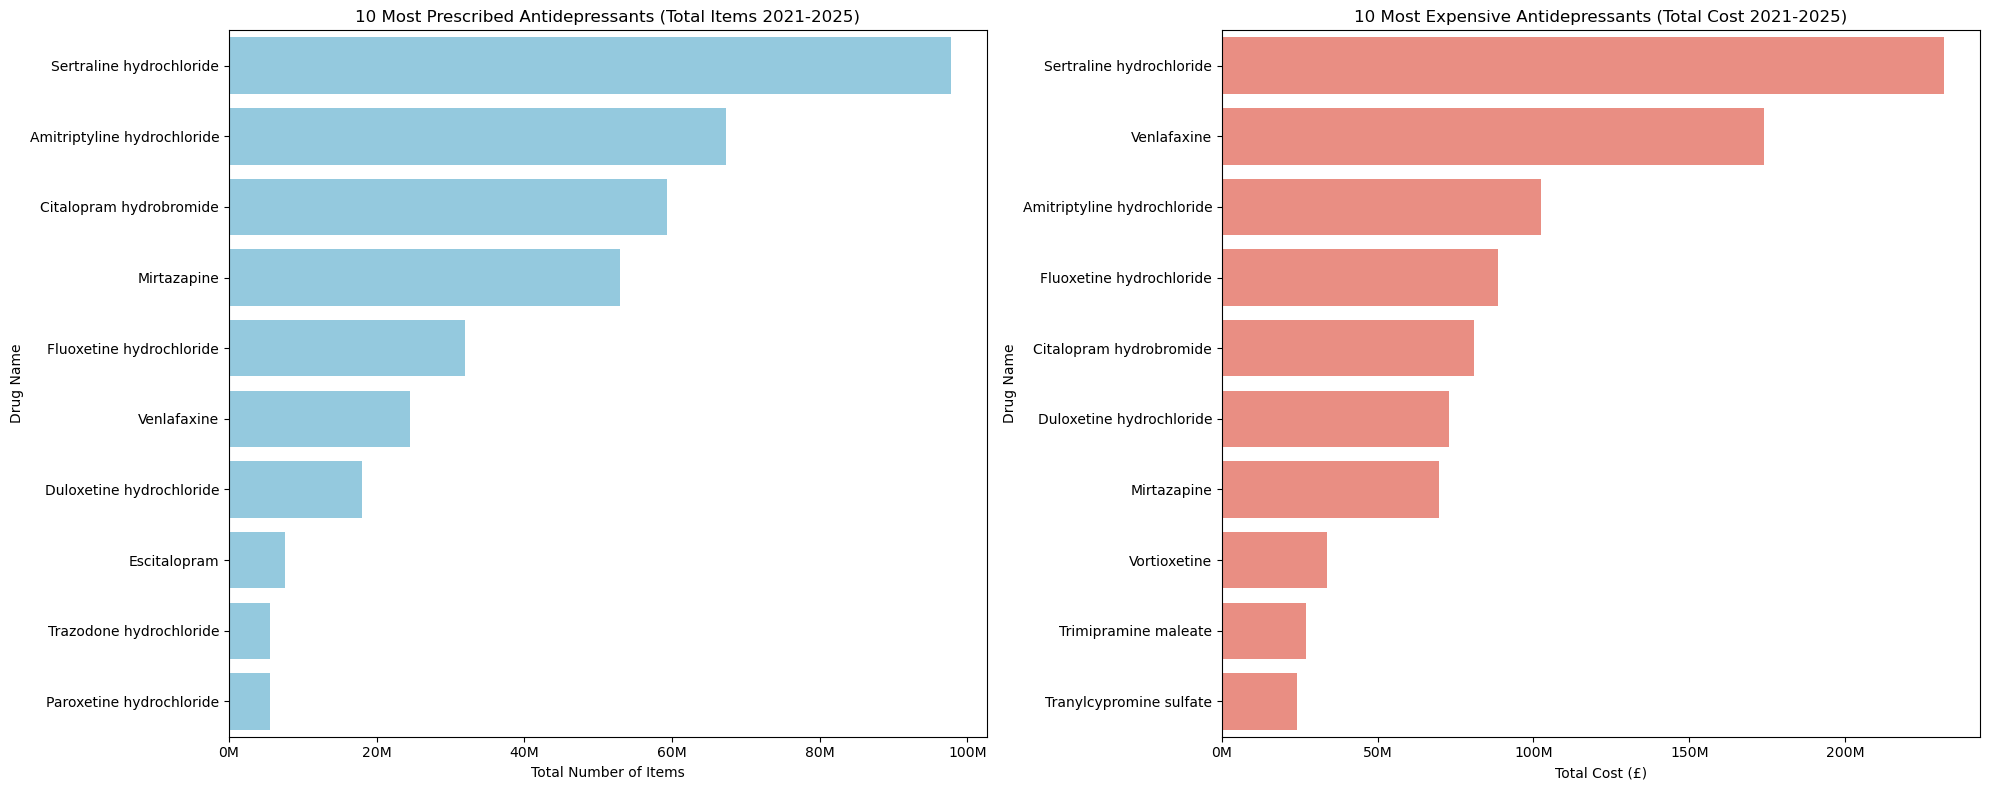

In [52]:
# Aggregate data by drug name
drug_totals = pca_regional_drug_summary_df.groupby('BNF_CHEMICAL_SUBSTANCE').agg({
    'ITEMS': 'sum',
    'COST': 'sum'
}).reset_index()

# Sort the data to get top 10 for ITEMS and COST
top_10_items = drug_totals.nlargest(10, 'ITEMS')
top_10_cost = drug_totals.nlargest(10, 'COST')

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plot horizontal bar chart for top 10 items
sns.barplot(data=top_10_items, y='BNF_CHEMICAL_SUBSTANCE', x='ITEMS', color='skyblue', ax=ax1)
ax1.set_title('10 Most Prescribed Antidepressants (Total Items 2021-2025)')
ax1.set_xlabel('Total Number of Items')
ax1.set_ylabel('Drug Name')
ax1.xaxis.set_major_formatter(formatter)

# Plot horizontal bar chart for top 10 cost
sns.barplot(data=top_10_cost, y='BNF_CHEMICAL_SUBSTANCE', x='COST', color='salmon', ax=ax2)
ax2.set_title('10 Most Expensive Antidepressants (Total Cost 2021-2025)')
ax2.set_xlabel('Total Cost (£)')
ax2.set_ylabel('Drug Name')
ax2.xaxis.set_major_formatter(formatter);

# Adjust layout for better spacing
plt.tight_layout();



### Monthly Trends

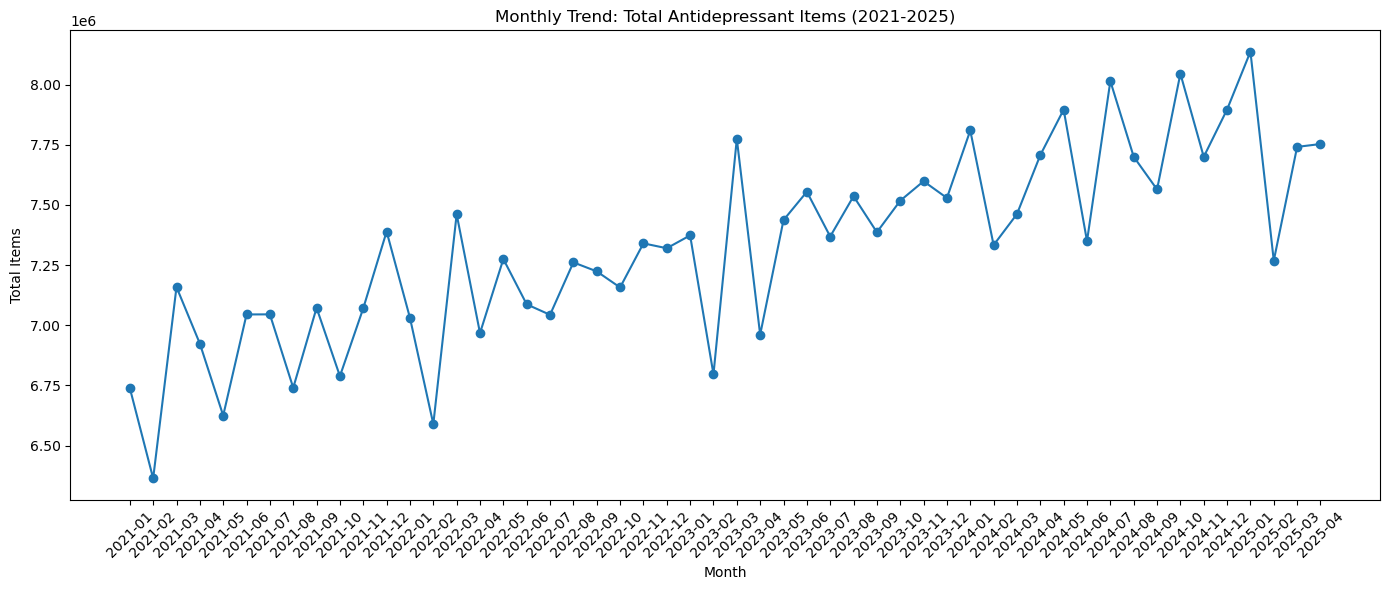

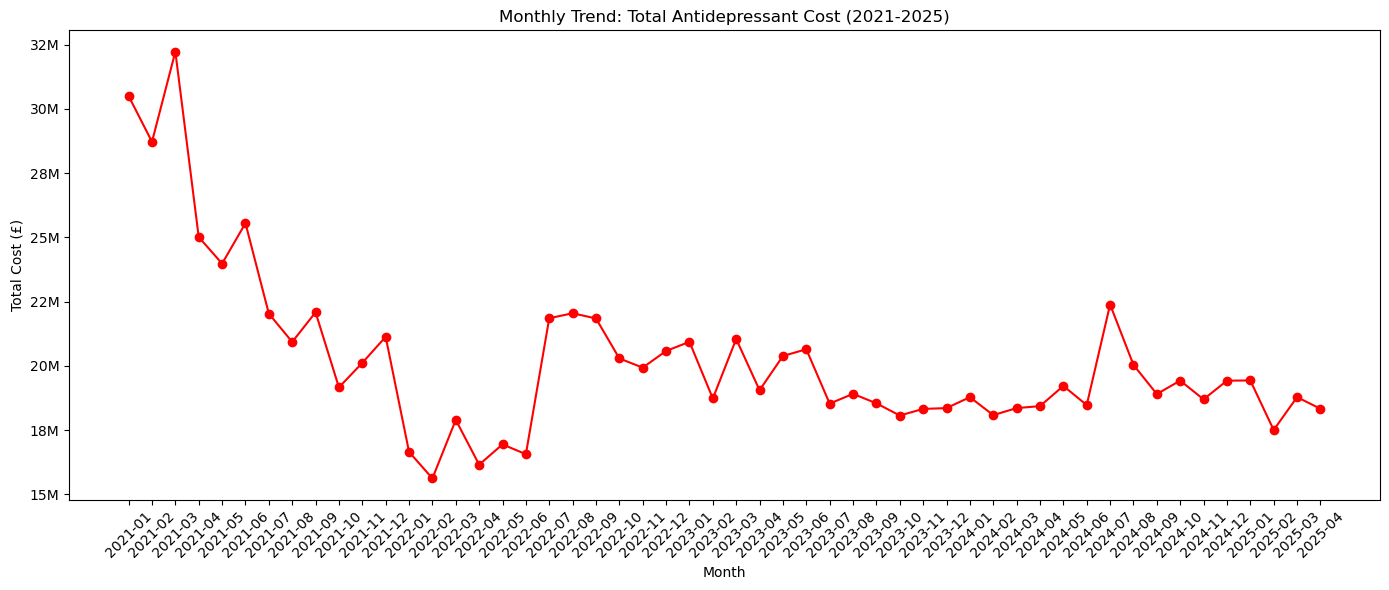

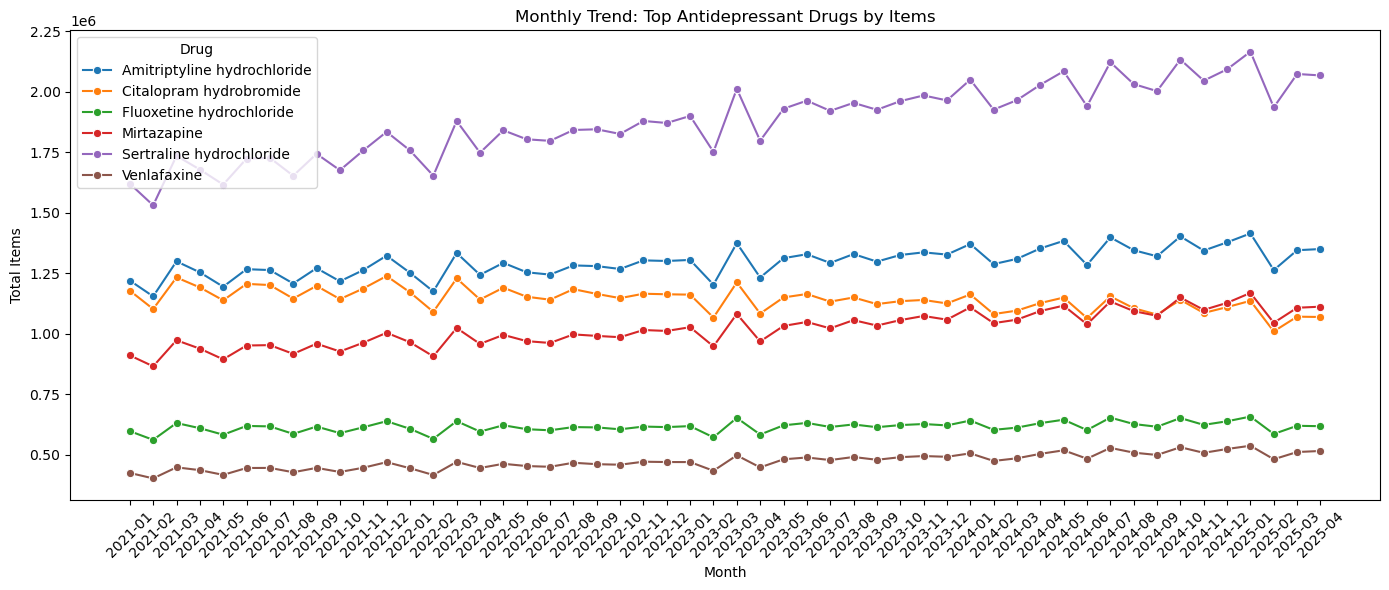

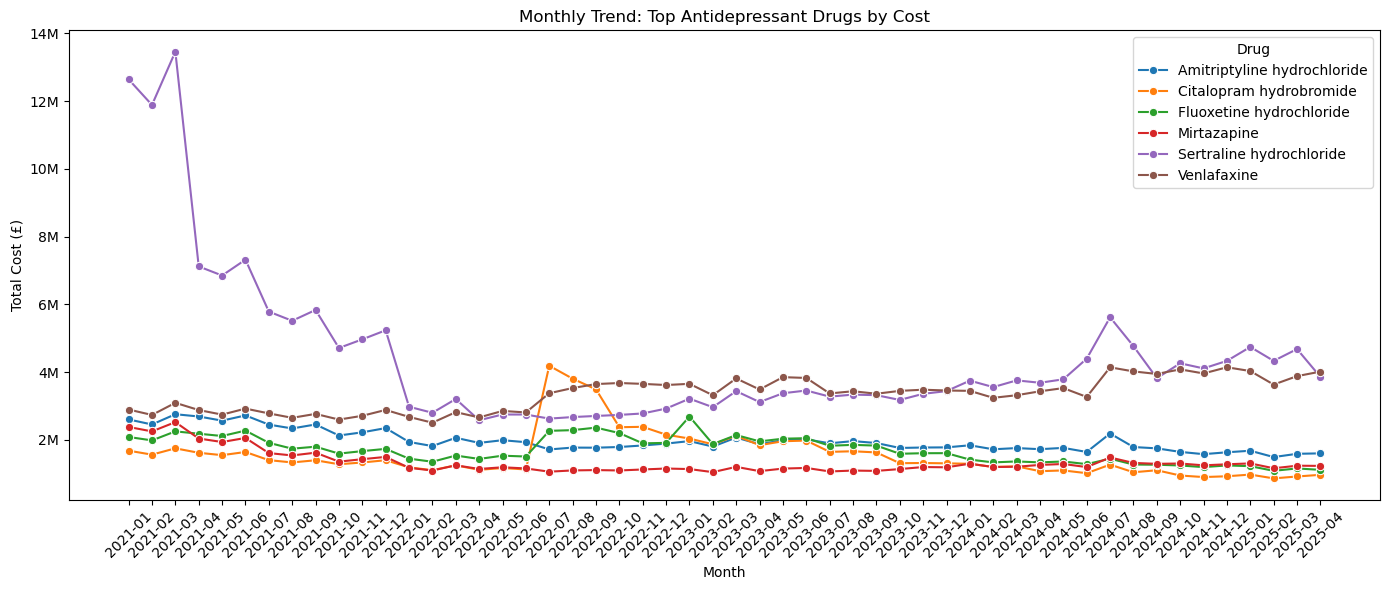

In [54]:
monthly_totals = pca_regional_drug_summary_df.groupby('YEAR_MONTH', as_index=False).agg({'ITEMS': 'sum', 'COST': 'sum'})

# Plot longitudinal trend for total items
plt.figure(figsize=(14,6))
plt.plot(monthly_totals['YEAR_MONTH'], monthly_totals['ITEMS'], marker='o', linestyle='-')
plt.title('Monthly Trend: Total Antidepressant Items (2021-2025)')
plt.xlabel('Month')
plt.ylabel('Total Items')
plt.xticks(rotation=45)
plt.tight_layout()

# Plot longitudinal trend for total cost
plt.figure(figsize=(14,6))
plt.plot(monthly_totals['YEAR_MONTH'], monthly_totals['COST'], marker='o', linestyle='-', color='red')
plt.title('Monthly Trend: Total Antidepressant Cost (2021-2025)')
plt.xlabel('Month')
plt.ylabel('Total Cost (£)')
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(formatter)  # Format y-axis in millions
plt.tight_layout()

# Now, determine which drugs drive these trends.
# First, aggregate monthly totals by drug
monthly_by_drug = pca_regional_drug_summary_df.groupby(['YEAR_MONTH', 'BNF_CHEMICAL_SUBSTANCE'], as_index=False).agg({'ITEMS': 'sum', 'COST': 'sum'})

# Find overall totals per drug across the period to identify main drivers
drug_overall = pca_regional_drug_summary_df.groupby('BNF_CHEMICAL_SUBSTANCE', as_index=False).agg({'ITEMS': 'sum', 'COST': 'sum'})

# Get top 5 drugs by items and by cost
top_drugs_items = drug_overall.nlargest(5, 'ITEMS')['BNF_CHEMICAL_SUBSTANCE'].tolist()
top_drugs_cost = drug_overall.nlargest(5, 'COST')['BNF_CHEMICAL_SUBSTANCE'].tolist()

# Use union of both lists as drivers
top_drugs = list(set(top_drugs_items + top_drugs_cost))

# Filter monthly data for these top drugs
monthly_top_drugs = monthly_by_drug[monthly_by_drug['BNF_CHEMICAL_SUBSTANCE'].isin(top_drugs)]

# Plot monthly trends for items for these top drugs
plt.figure(figsize=(14,6))
sns.lineplot(data=monthly_top_drugs, x='YEAR_MONTH', y='ITEMS', hue='BNF_CHEMICAL_SUBSTANCE', marker='o')
plt.title('Monthly Trend: Top Antidepressant Drugs by Items')
plt.xlabel('Month')
plt.ylabel('Total Items')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Drug')

# Plot monthly trends for cost for these top drugs
plt.figure(figsize=(14,6))
sns.lineplot(data=monthly_top_drugs, x='YEAR_MONTH', y='COST', hue='BNF_CHEMICAL_SUBSTANCE', marker='o')
plt.title('Monthly Trend: Top Antidepressant Drugs by Cost')
plt.xlabel('Month')
plt.ylabel('Total Cost (£)')
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(formatter)  # Format y-axis in millions
plt.tight_layout()
plt.legend(title='Drug')

# Calculation of overall contribution percentages for these drugs
total_items = monthly_totals['ITEMS'].sum()
total_cost = monthly_totals['COST'].sum()
summary_df = drug_overall.copy()
summary_df['Items_Percent'] = summary_df['ITEMS']/total_items*100
summary_df['Cost_Percent'] = summary_df['COST']/total_cost*100


In [55]:
print('Overall contribution percentages for each drug:')
summary_df.sort_values('ITEMS', ascending=False)[['BNF_CHEMICAL_SUBSTANCE', 'Items_Percent', 'Cost_Percent']].head(10)

Overall contribution percentages for each drug:


,BNF_CHEMICAL_SUBSTANCE,Items_Percent,Cost_Percent
25,Sertraline hydrochloride,25.670790,21.987452
1,Amitriptyline hydrochloride,17.685068,9.708757
3,Citalopram hydrobromide,15.586147,7.665310
17,Mirtazapine,13.911742,6.617696
10,Fluoxetine hydrochloride,8.387595,8.393665
30,Venlafaxine,6.436799,16.515542
8,Duloxetine hydrochloride,4.723074,6.928627
9,Escitalopram,1.992116,1.424070
27,Trazodone hydrochloride,1.453646,1.894254
22,Paroxetine hydrochloride,1.446480,1.458188


In [56]:
def analyze_drug(chemical_substance):
    # Filter data for specified drug
    drug_data = pca_regional_drug_summary_df[pca_regional_drug_summary_df['BNF_CHEMICAL_SUBSTANCE'] == chemical_substance]
    
    # Calculate overall totals for all drugs
    total_items_all = pca_regional_drug_summary_df['ITEMS'].sum()
    total_cost_all = pca_regional_drug_summary_df['COST'].sum()
    
    # Aggregate data for specified drug overall
    drug_totals = drug_data.agg({'ITEMS': 'sum', 'COST': 'sum'}).to_dict()
    perc_items = drug_totals['ITEMS']/total_items_all*100
    perc_cost = drug_totals['COST']/total_cost_all*100
    
    # Overall mean cost per item for the drug
    mean_cost_item_overall = drug_totals['COST'] / drug_totals['ITEMS']
    
    # Compute monthly mean cost per item
    drug_data['mean_cost_item'] = drug_data['COST'] / drug_data['ITEMS']
    monthly_drug = drug_data.groupby('YEAR_MONTH').agg({'mean_cost_item': 'mean'}).reset_index()
    
    # Distribution of mean cost per item values (histogram)
    plt.figure(figsize=(12,6))
    plt.hist(drug_data['mean_cost_item'], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of Mean Cost per Item for {chemical_substance}')
    plt.xlabel('Mean Cost per Item (£)')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()
    
    # Plot monthly trend of mean cost per item
    plt.figure(figsize=(14,6))
    plt.plot(monthly_drug['YEAR_MONTH'], monthly_drug['mean_cost_item'], marker='o', linestyle='-')
    plt.title(f'Monthly Trend of Mean Cost per Item for {chemical_substance}')
    plt.xlabel('Month')
    plt.ylabel('Mean Cost per Item (£)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # Monthly aggregation for scatter plot
    drug_monthly_agg = drug_data.groupby('YEAR_MONTH').agg({'ITEMS': 'sum', 'COST': 'sum'}).reset_index()
    drug_monthly_agg['mean_cost_item'] = drug_monthly_agg['COST'] / drug_monthly_agg['ITEMS']
    
    # Scatter plot of items vs mean cost per item
    plt.figure(figsize=(12,6))
    plt.scatter(drug_monthly_agg['ITEMS'], drug_monthly_agg['mean_cost_item'], color='skyblue')
    plt.title(f'Monthly Items vs Mean Cost per Item for {chemical_substance}')
    plt.xlabel('Total Items')
    plt.ylabel('Mean Cost per Item (£)')
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print(f"Analysis for {chemical_substance}:")
    print(f"Percentage of total items: {perc_items:.2f}%")
    print(f"Percentage of total cost: {perc_cost:.2f}%")
    print(f"Overall mean cost per item: £{mean_cost_item_overall:.2f}")


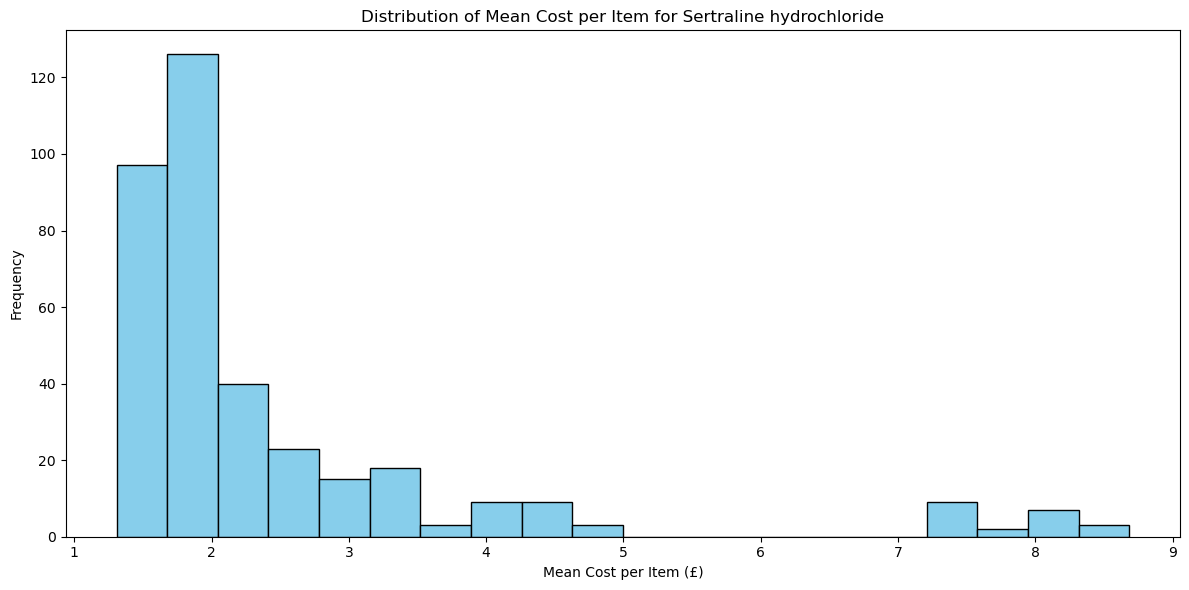

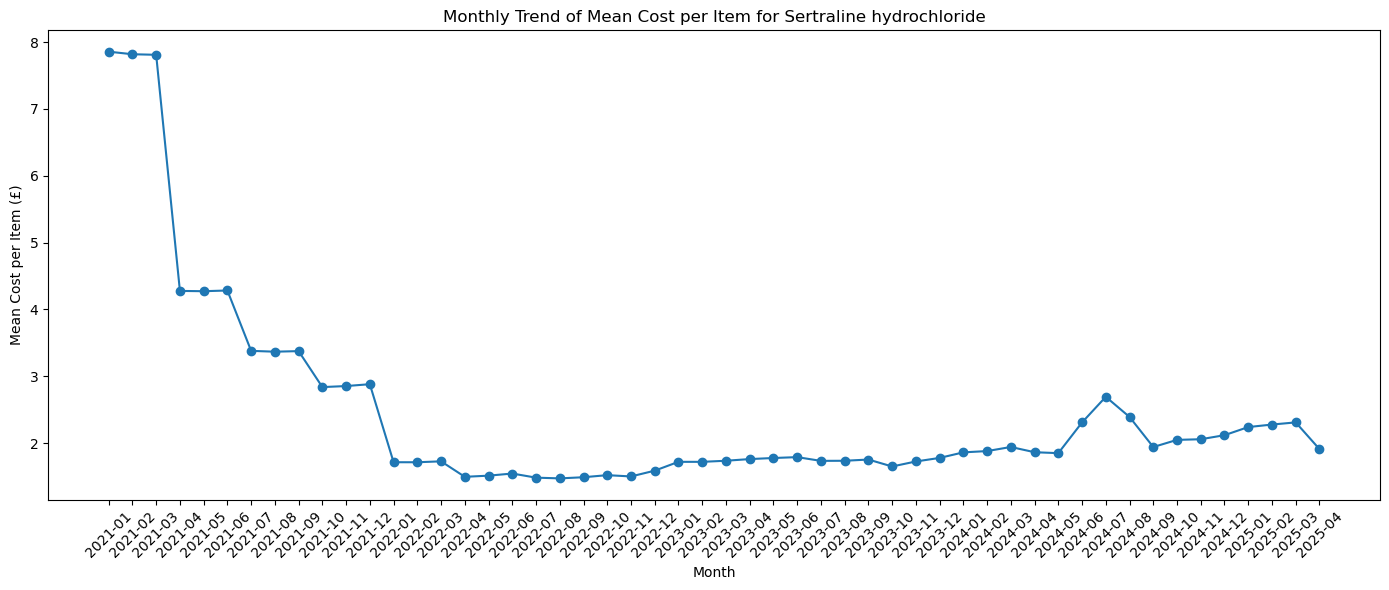

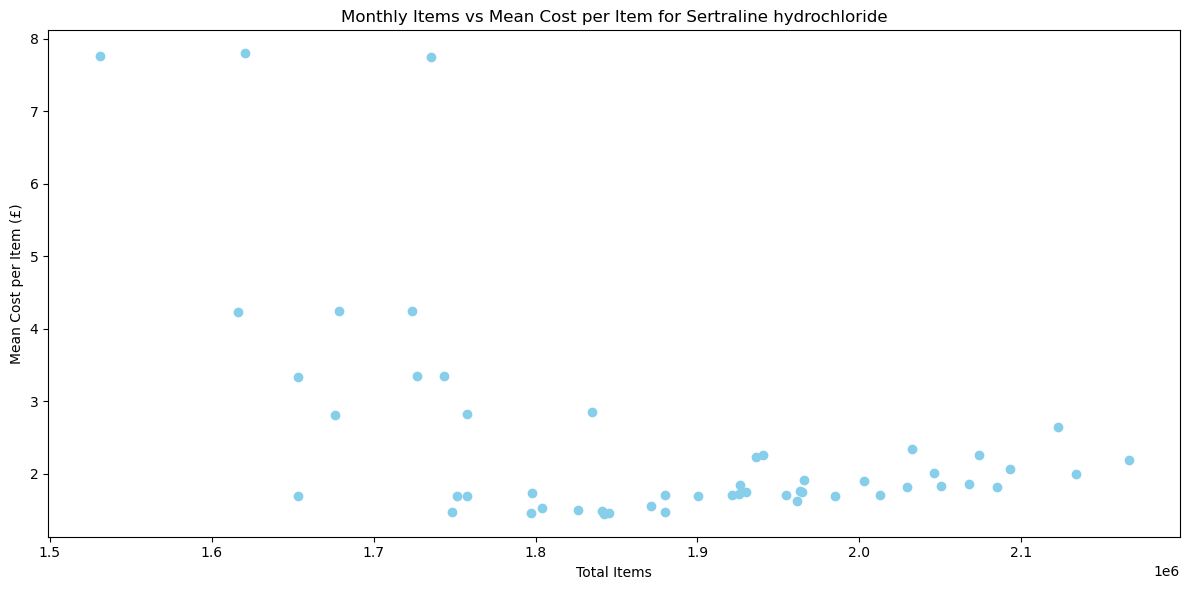

Analysis for Sertraline hydrochloride:
Percentage of total items: 25.67%
Percentage of total cost: 21.99%
Overall mean cost per item: £2.37


In [57]:
analyze_drug('Sertraline hydrochloride')

### Distribution of mean cost per item values for any anti-depressant across regions

In [59]:
def analyze_drug_by_region(chemical_substance):
    # Filter data for specified drug
    drug_data = pca_regional_drug_summary_df[pca_regional_drug_summary_df['BNF_CHEMICAL_SUBSTANCE'] == chemical_substance]
    
    # Distribution of mean cost per item values across regions
    drug_distribution = drug_data.groupby("REGION_NAME")["COST"].sum() / drug_data.groupby("REGION_NAME")["ITEMS"].sum()
    
    # Compute additional relevant insights
    highest_region = drug_distribution.idxmax()
    lowest_region = drug_distribution.idxmin()
    highest_cost = drug_distribution.max()
    lowest_cost = drug_distribution.min()
    highest_spending_region = drug_data.groupby("REGION_NAME")["COST"].sum().idxmax()
    lowest_spending_region = drug_data.groupby("REGION_NAME")["COST"].sum().idxmin()
    
    # Summary of key results
    summary = {
        "Region with Highest Mean Cost per Item": highest_region,
        "Region with Lowest Mean Cost per Item": lowest_region,
        "Highest Mean Cost per Item": f"£{highest_cost:.2f}",
        "Lowest Mean Cost per Item": f"£{lowest_cost:.2f}",
        "Region with Highest Total Spending": highest_spending_region,
        "Region with Lowest Total Spending": lowest_spending_region,
    }
    
    # Print summary
    print(f"Regional Analysis for {chemical_substance}:")
    print("-" * 50)
    for key, value in summary.items():
        print(f"{key}: {value}")
    
    return drug_distribution

#### Distribution of mean cost per item values for Sertraline hydrochloride across regions

# analyze_drug_by_region('Sertraline hydrochloride')